In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
ad_df = pd.read_csv('/Users/nayoneekapaul/Documents/CODECLAUSE/Ad_Sales_prediction/advertising.csv')

In [3]:
ad_df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [4]:
ad_df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [5]:
ad_df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

/var/folders/sx/t9vt37b513136n47lyz7nc9w0000gn/T/ipykernel_72468/3911475834.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ad_df['TV'])


<Axes: xlabel='TV', ylabel='Density'>

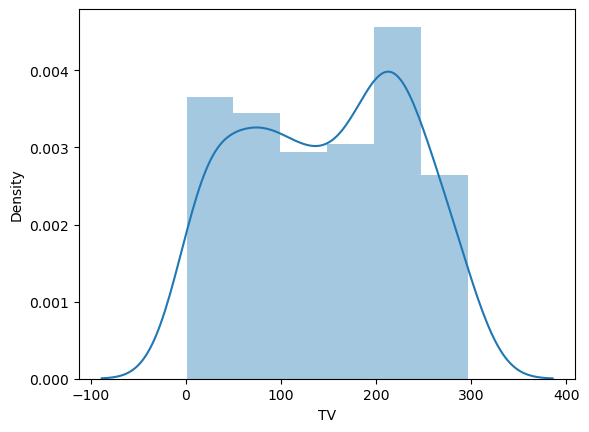

In [6]:
sns.distplot(ad_df['TV'])

/var/folders/sx/t9vt37b513136n47lyz7nc9w0000gn/T/ipykernel_72468/928980662.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ad_df['Sales'])


<Axes: xlabel='Sales', ylabel='Density'>

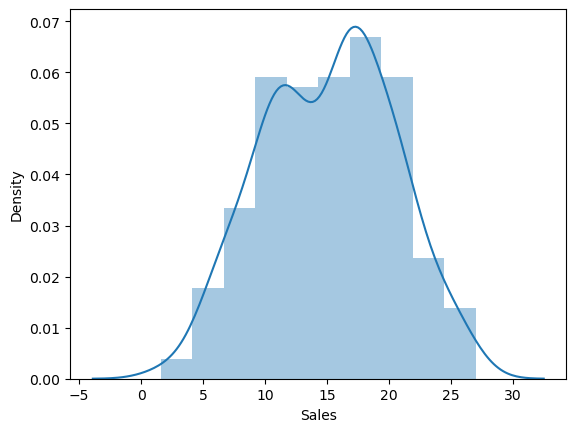

In [7]:
sns.distplot(ad_df['Sales'])

/var/folders/sx/t9vt37b513136n47lyz7nc9w0000gn/T/ipykernel_72468/2928644745.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ad_df['Newspaper'])


<Axes: xlabel='Newspaper', ylabel='Density'>

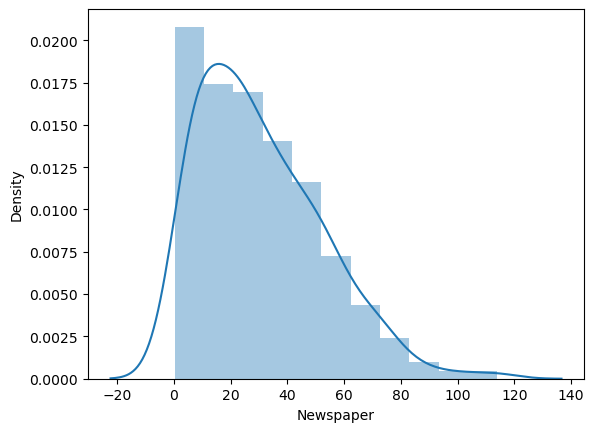

In [8]:
sns.distplot(ad_df['Newspaper'])

<Axes: xlabel='TV', ylabel='Sales'>

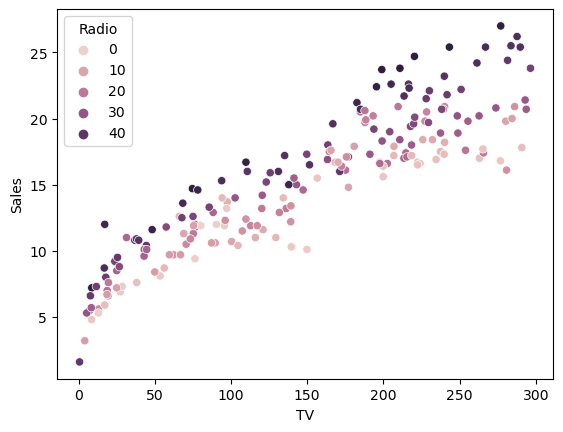

In [9]:
sns.scatterplot(x='TV', y='Sales',hue ="Radio", data=ad_df )

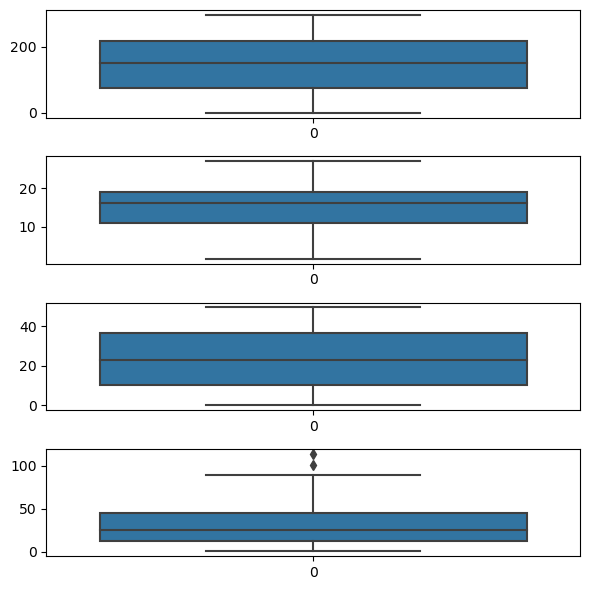

In [10]:
#outlier analysis
fig,axs = plt.subplots(4, figsize = (6,6))
plt1 = sns.boxplot(ad_df['TV'], ax = axs[0])
plt2 = sns.boxplot(ad_df['Sales'], ax = axs[1])
plt3 = sns.boxplot(ad_df['Radio'], ax = axs[2])
plt4 = sns.boxplot(ad_df['Newspaper'], ax = axs[3])
plt.tight_layout()

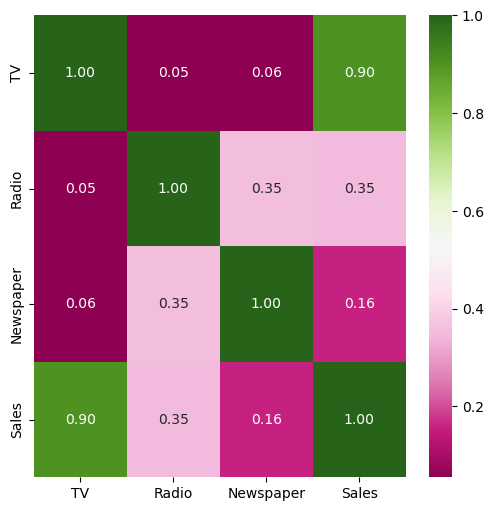

In [11]:
#correlation between different variables
plt.figure(figsize = (6,6))
sns.heatmap(ad_df.corr(), cmap = "PiYG", annot = True, fmt = '.2f')
plt.show()

In [12]:
X = ad_df.iloc[:,0:3]
y = ad_df.iloc[:,3:4]

In [13]:
type(X)

pandas.core.frame.DataFrame

In [14]:
X = ad_df.iloc[:,0:3].values
y = ad_df.iloc[:,3:4].values

In [15]:
type(X)

numpy.ndarray

In [16]:
X

array([[230.1,  37.8,  69.2],
       [ 44.5,  39.3,  45.1],
       [ 17.2,  45.9,  69.3],
       [151.5,  41.3,  58.5],
       [180.8,  10.8,  58.4],
       [  8.7,  48.9,  75. ],
       [ 57.5,  32.8,  23.5],
       [120.2,  19.6,  11.6],
       [  8.6,   2.1,   1. ],
       [199.8,   2.6,  21.2],
       [ 66.1,   5.8,  24.2],
       [214.7,  24. ,   4. ],
       [ 23.8,  35.1,  65.9],
       [ 97.5,   7.6,   7.2],
       [204.1,  32.9,  46. ],
       [195.4,  47.7,  52.9],
       [ 67.8,  36.6, 114. ],
       [281.4,  39.6,  55.8],
       [ 69.2,  20.5,  18.3],
       [147.3,  23.9,  19.1],
       [218.4,  27.7,  53.4],
       [237.4,   5.1,  23.5],
       [ 13.2,  15.9,  49.6],
       [228.3,  16.9,  26.2],
       [ 62.3,  12.6,  18.3],
       [262.9,   3.5,  19.5],
       [142.9,  29.3,  12.6],
       [240.1,  16.7,  22.9],
       [248.8,  27.1,  22.9],
       [ 70.6,  16. ,  40.8],
       [292.9,  28.3,  43.2],
       [112.9,  17.4,  38.6],
       [ 97.2,   1.5,  30. ],
       [26

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 0)

In [18]:
X_test.shape

(40, 3)

In [19]:
y_test.shape

(40, 1)

In [20]:

sdc = StandardScaler()
X_train = sdc.fit_transform(X_train)#feature scaling
X_test = sdc.fit_transform(X_test)

In [21]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [22]:
y_pred= lr.predict(X_test)
y_pred

array([[11.85347427],
       [ 9.90588017],
       [10.76558383],
       [25.4808191 ],
       [15.65528291],
       [ 9.55629711],
       [11.58893696],
       [19.30070192],
       [10.9182702 ],
       [18.80314052],
       [24.04456877],
       [11.82536588],
       [14.48233323],
       [18.0759572 ],
       [12.8777854 ],
       [14.41451549],
       [22.00875284],
       [10.39418189],
       [15.14925121],
       [19.76278563],
       [25.38009928],
       [13.56253618],
       [17.49795821],
       [14.80493919],
       [ 9.04685529],
       [16.17131801],
       [15.71111771],
       [21.50713724],
       [17.92031345],
       [10.05064533],
       [13.19603579],
       [21.52129568],
       [22.014685  ],
       [22.63021387],
       [ 8.36349314],
       [ 8.32558497],
       [10.36424063],
       [16.44921208],
       [14.33087568],
       [ 8.51255875]])

In [23]:
y_test

array([[11.3],
       [ 8.4],
       [12. ],
       [25.4],
       [16.7],
       [ 8.7],
       [ 7.2],
       [18.2],
       [ 9.2],
       [16.6],
       [24.2],
       [10.6],
       [15.5],
       [20.6],
       [11.8],
       [13.2],
       [17.4],
       [ 1.6],
       [14.7],
       [17. ],
       [26.2],
       [10.3],
       [16.1],
       [12.9],
       [ 8.1],
       [15.2],
       [17.6],
       [22.6],
       [16.6],
       [ 8.5],
       [12.5],
       [23.7],
       [16.1],
       [21.8],
       [ 5.6],
       [ 6.7],
       [ 9.7],
       [17.9],
       [13.6],
       [ 7.2]])

In [24]:
X_test

array([[-0.72685844, -0.14851009, -0.60786277],
       [-0.9451206 , -0.73141627, -0.60351079],
       [-0.48586065, -1.47151064, -0.39461576],
       [ 1.77974598,  1.27928259,  0.82393857],
       [ 0.42129143, -0.98029756,  0.12762181],
       [-0.87464011, -1.11783722, -0.11173708],
       [-1.41461158,  1.71155009,  1.85970975],
       [ 1.21590208, -1.0130451 , -1.02565283],
       [-1.24295749,  0.80771803,  1.46367959],
       [ 0.73276971,  0.03487613, -0.78629394],
       [ 1.45689988,  1.30548062,  0.97625786],
       [-0.52223767, -0.71831725, -0.27711231],
       [ 0.26668907, -1.32087196, -1.04306075],
       [ 0.62136507, -0.10921304, -0.99083699],
       [-0.64501014,  0.25755939, -0.43378358],
       [-0.1470996 , -0.20745566, -0.89944542],
       [ 1.5057815 , -0.18125762, -1.39121913],
       [-1.50555415,  1.10244588, -1.02565283],
       [-0.66433543,  1.74429763,  0.58457968],
       [ 0.91238127,  0.12001973, -0.83416572],
       [ 1.75587355,  1.32512914,  1.720

In [25]:
accuracy = r2_score(y_test, y_pred)
accuracy

0.8233668011989852